In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [3]:
df.shape

(40432, 4)

In [4]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

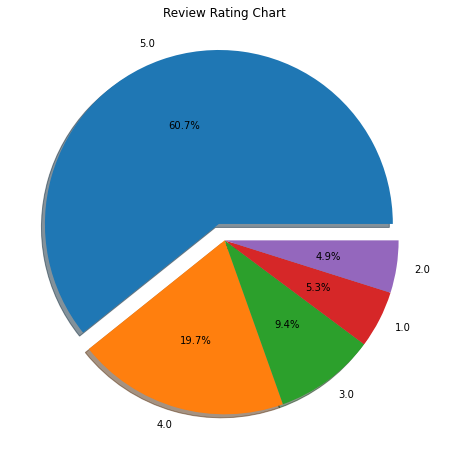

In [8]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Review Rating Chart')
plt.show()

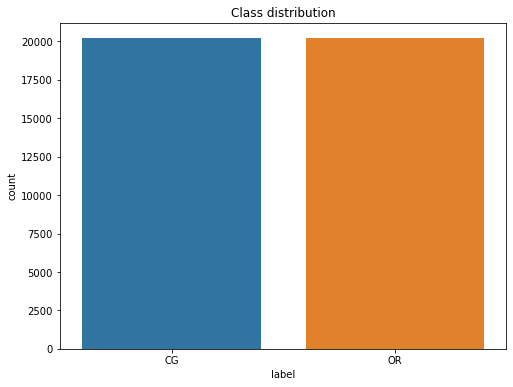

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=df)
plt.title('Class distribution')
plt.show()

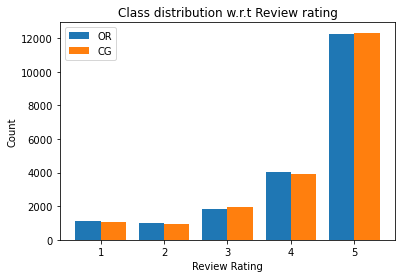

In [10]:
labels = df['rating'].value_counts().keys()
y1 = df[df.label.str.strip() == 'OR']['rating'].value_counts().values
y2 = df[df.label.str.strip() == 'CG']['rating'].value_counts().values
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(labels-0.2, y1, width)
plt.bar(labels+0.2, y2, width)
plt.xlabel("Review Rating")
plt.ylabel("Count")
plt.legend(["OR", "CG"])
plt.title('Class distribution w.r.t Review rating')
plt.show()

In [11]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [12]:
#df.to_csv('Preprocessed_Fake_Reviews_Detection_Dataset.csv')

In [13]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
wn = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/d.dasarathan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
# Pre-Processed News Dataset 1
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation
# 5. lemmatize words

from string import punctuation

def lemmatize_preprocessed_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Lemmatize words
    lemmatized_words = [wn.lemmatize(word) for word in words]
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in lemmatized_words)
    
    return cleaned_news_excerpt

In [15]:
# Pre-Processed News Dataset 2
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation
# 5. stem words

def stemmed_preprocessed_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Stem words
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in stemmed_words)
    
    return cleaned_news_excerpt

In [16]:
# Pre-Processed News Dataset 3
# 1. set reviews to lowercase
# 2. remove urls
# 3. remove stopwords
# 4. remove punctuation

def preprocess_news(news_excerpt):
    '''
    Input:
        news_excerpt: a string containing a news excerpt.
    Output:
        news_excerpt_cleaned: a preprocessed and lemmatized news excerpt

    '''
    # Set news excerpt to lowercase
    lowercase_news_excerpt = news_excerpt.lower()
    
    # Remove links from lowercase news excerpt
    urls_removed_news_excerpt = re.sub(r"https?://\S+", "", lowercase_news_excerpt)
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = urls_removed_news_excerpt.split()
    stopwords_removed = [word for word in words if word not in stop_words]

    # Change tokenized words back into a string for removal of punctuation
    text = ' '.join(word for word in stopwords_removed)
    
    # Remove punctuation from news excerpt
    punctuation_removed_news_excerpt = ''.join(char for char in text if char not in punctuation)

    # Tokenize words in news excerpt
    words = word_tokenize(punctuation_removed_news_excerpt)
    
    # Convert list of words back to string
    cleaned_news_excerpt = ' '.join(word for word in words)
    
    return cleaned_news_excerpt

In [17]:
df["lemmatized_text_"] = df["text_"].apply(lemmatize_preprocessed_news)
df["stemmed_text_"] = df["text_"].apply(stemmed_preprocessed_news)
df["cleaned_text_"] = df["text_"].apply(preprocess_news)
df["lemmatized_tokens"] = df["lemmatized_text_"].str.split(" ")
df["stemmed_tokens"] = df["stemmed_text_"].str.split(" ")
df.head()

,category,rating,label,text_,lemmatized_text_,stemmed_text_,cleaned_text_,lemmatized_tokens,stemmed_tokens
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love this well made sturdy comfortable love it...,love thi well made sturdi comfort love itveri ...,love this well made sturdy comfortable love it...,"[love, this, well, made, sturdy, comfortable, ...","[love, thi, well, made, sturdi, comfort, love,..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love it great upgrade original ive mine couple...,love it great upgrad origin ive mine coupl year,love it great upgrade original ive mine couple...,"[love, it, great, upgrade, original, ive, mine...","[love, it, great, upgrad, origin, ive, mine, c..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,pillow save back love look feel pillow,pillow saved back love look feel pillow,"[pillow, saved, back, love, look, feel, pillow]","[pillow, save, back, love, look, feel, pillow]"
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use it great product price,miss inform use it great product price,missing information use it great product price,"[missing, information, use, it, great, product...","[miss, inform, use, it, great, product, price]"
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two month,nice set good qualiti set two month,nice set good quality set two months,"[nice, set, good, quality, set, two, month]","[nice, set, good, qualiti, set, two, month]"


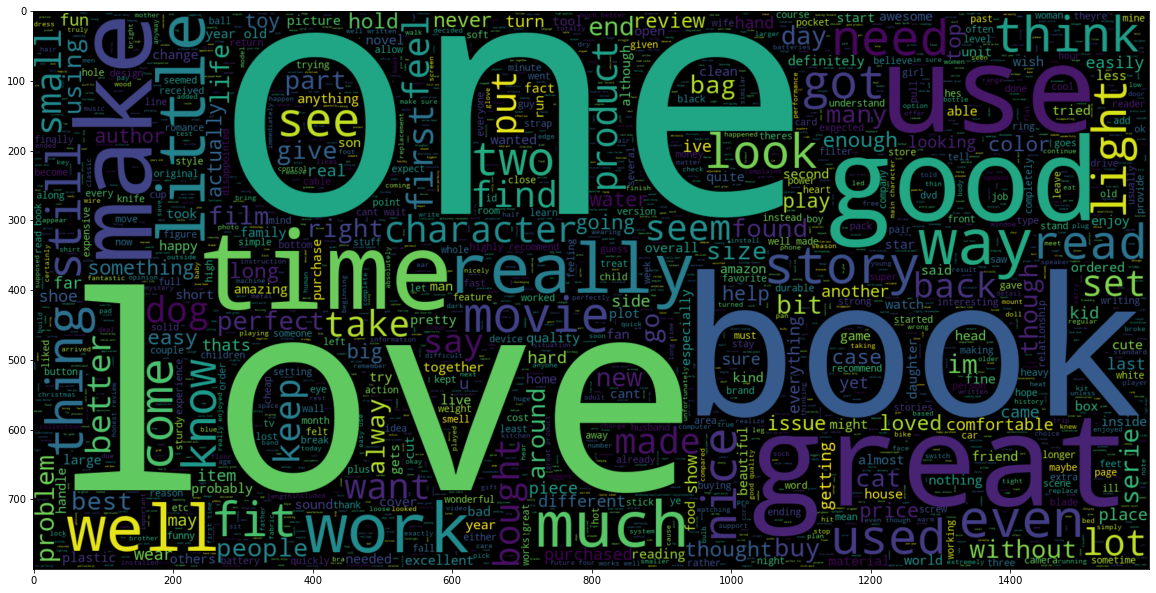

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## word cloud of original reviews
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.label == 'OR'].cleaned_text_))
plt.imshow(wc, interpolation = 'bilinear')

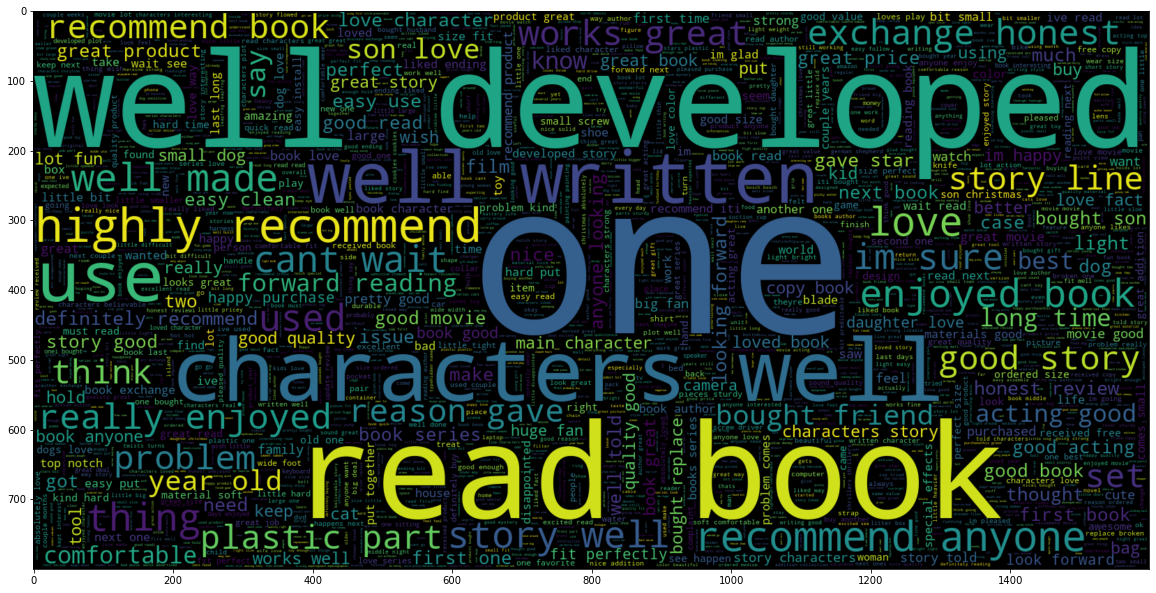

In [19]:
## word cloud of computer generated reviews
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.label == 'CG'].cleaned_text_))
plt.imshow(wc, interpolation = 'bilinear')

In [20]:
df.head()

,category,rating,label,text_,lemmatized_text_,stemmed_text_,cleaned_text_,lemmatized_tokens,stemmed_tokens
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love this well made sturdy comfortable love it...,love thi well made sturdi comfort love itveri ...,love this well made sturdy comfortable love it...,"[love, this, well, made, sturdy, comfortable, ...","[love, thi, well, made, sturdi, comfort, love,..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love it great upgrade original ive mine couple...,love it great upgrad origin ive mine coupl year,love it great upgrade original ive mine couple...,"[love, it, great, upgrade, original, ive, mine...","[love, it, great, upgrad, origin, ive, mine, c..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,pillow save back love look feel pillow,pillow saved back love look feel pillow,"[pillow, saved, back, love, look, feel, pillow]","[pillow, save, back, love, look, feel, pillow]"
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use it great product price,miss inform use it great product price,missing information use it great product price,"[missing, information, use, it, great, product...","[miss, inform, use, it, great, product, price]"
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two month,nice set good qualiti set two month,nice set good quality set two months,"[nice, set, good, quality, set, two, month]","[nice, set, good, qualiti, set, two, month]"


In [21]:
## Train Test split
X = df.drop(['label'], axis=1)
y= df['label']

In [22]:
X.head()

,category,rating,text_,lemmatized_text_,stemmed_text_,cleaned_text_,lemmatized_tokens,stemmed_tokens
0,Home_and_Kitchen_5,5.0,"Love this! Well made, sturdy, and very comfor...",love this well made sturdy comfortable love it...,love thi well made sturdi comfort love itveri ...,love this well made sturdy comfortable love it...,"[love, this, well, made, sturdy, comfortable, ...","[love, thi, well, made, sturdi, comfort, love,..."
1,Home_and_Kitchen_5,5.0,"love it, a great upgrade from the original. I...",love it great upgrade original ive mine couple...,love it great upgrad origin ive mine coupl year,love it great upgrade original ive mine couple...,"[love, it, great, upgrade, original, ive, mine...","[love, it, great, upgrad, origin, ive, mine, c..."
2,Home_and_Kitchen_5,5.0,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,pillow save back love look feel pillow,pillow saved back love look feel pillow,"[pillow, saved, back, love, look, feel, pillow]","[pillow, save, back, love, look, feel, pillow]"
3,Home_and_Kitchen_5,1.0,"Missing information on how to use it, but it i...",missing information use it great product price,miss inform use it great product price,missing information use it great product price,"[missing, information, use, it, great, product...","[miss, inform, use, it, great, product, price]"
4,Home_and_Kitchen_5,5.0,Very nice set. Good quality. We have had the s...,nice set good quality set two month,nice set good qualiti set two month,nice set good quality set two months,"[nice, set, good, quality, set, two, month]","[nice, set, good, qualiti, set, two, month]"


In [23]:
y.head()

0    CG
1    CG
2    CG
3    CG
4    CG
Name: label, dtype: object

In [24]:
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.35)

In [25]:
print('x_train shape : ',x_train.shape)
print('x_val shape : ',x_val.shape)
print('y_train shape : ',y_train.shape)
print('y_val shape : ',y_val.shape)

x_train shape :  (26280, 8)
x_val shape :  (14152, 8)
y_train shape :  (26280,)
y_val shape :  (14152,)


In [26]:
y_train.head()

37692    OR
9771     CG
11265    CG
23659    OR
3452     CG
Name: label, dtype: object

In [27]:
y_val.head()

17187    OR
36818    CG
32978    OR
14444    CG
27777    OR
Name: label, dtype: object

In [28]:
from sklearn import preprocessing
y_train= preprocessing.label_binarize(y_train, classes =['OR', 'CG'])
y_val = preprocessing.label_binarize(y_val, classes =['OR', 'CG'])

In [29]:
## CG = 1; OR = 0
y_train[0:5]

array([[0],
       [1],
       [1],
       [0],
       [1]])

In [30]:
## CG = 1; OR = 0
y_val[0:5]

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [31]:
## Create Bag of Words preprocessed datasets
from sklearn.feature_extraction.text import CountVectorizer

corpus1 = x_train['text_'].values.tolist()
corpus2 = x_train['text_'].values.tolist()
corpus1_val = x_val['text_'].values.tolist()
corpus2_val = x_val['text_'].values.tolist()


# Lemmatized One-hot Encoding
vectorizer = CountVectorizer(binary = True, preprocessor= lemmatize_preprocessed_news)
x_lemmatized_ohe = vectorizer.fit_transform(corpus1).toarray()
x_lemmatized_ohe_val = vectorizer.transform(corpus1_val).toarray()


# Stemmed One-hot Encoding
x_stemmed_ohe = vectorizer.fit_transform(corpus2).toarray()
x_stemmed_ohe_val = vectorizer.transform(corpus2_val).toarray()


# Lemmatized Bag of Words
vectorizer = CountVectorizer(preprocessor= lemmatize_preprocessed_news)
x_lemmatized_bow = vectorizer.fit_transform(corpus1).toarray()
x_lemmatized_bow_val = vectorizer.transform(corpus1_val).toarray()


# Stemmed Bag of Words
vectorizer = CountVectorizer(preprocessor=stemmed_preprocessed_news)
x_stemmed_bow = vectorizer.fit_transform(corpus2).toarray()
x_stemmed_bow_val = vectorizer.transform(corpus2_val).toarray()

In [32]:
## Create TFIDF preprocessed datasets
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor = lemmatize_preprocessed_news)
x_lemmatized_tfidf = vectorizer.fit_transform(corpus1).toarray()
x_lemmatized_tfidf_val = vectorizer.transform(corpus1_val).toarray()

vectorizer = TfidfVectorizer(preprocessor=stemmed_preprocessed_news)
x_stemmed_tfidf = vectorizer.fit_transform(corpus2).toarray()
x_stemmed_tfidf_val = vectorizer.transform(corpus2_val).toarray()

In [33]:
def create_w2vec_vectors(model, train, val):
  words = set(model.wv.index_to_key)
  x_train = np.array([np.array([model.wv[i] for i in ls if i in words]) for ls in train])
  x_val = np.array([np.array([model.wv[i] for i in ls if i in words]) for ls in val])
  

  x_train_avg = []
  for i in x_train:
    if i.size:
      x_train_avg.append(i.mean(axis=0))
    else:
        x_train_avg.append(np.zeros(100, dtype=float))

  x_val_avg = []
  for i in x_val:
    if i.size:
      x_val_avg.append(i.mean(axis=0))
    else:
        x_val_avg.append(np.zeros(100, dtype=float))

  return x_train_avg, x_val_avg

In [34]:
## Create Word2Vec vectors
import itertools
import gensim
from gensim.models import Word2Vec
lemmatized_tokns = list(x_train['lemmatized_tokens'])
lemmatized_token_list = list(itertools.chain(*lemmatized_tokns))

CBOW = gensim.models.Word2Vec([lemmatized_token_list], window =5, min_count=1, workers = 4)
SG = gensim.models.Word2Vec([lemmatized_token_list], window =5, min_count=1, workers = 4, sg=1)

#x_train['lemmatized_tokens'].values

#lemmatized_train_CBOW, lemmatized_val_CBOW, lemmatized_test_CBOW = 
lemmatized_train_CBOW, lemmatized_val_CBOW = create_w2vec_vectors(CBOW, x_train['lemmatized_tokens'].values, x_val['lemmatized_tokens'].values)

lemmatized_train_SG, lemmatized_val_SG = create_w2vec_vectors(SG, x_train["lemmatized_tokens"].values, x_val["lemmatized_tokens"].values)



stemmed_tokens = list(x_train['stemmed_tokens'])
stemmed_token_list = list(itertools.chain(*stemmed_tokens))
CBOW = gensim.models.Word2Vec([stemmed_token_list], window =5, min_count=1, workers = 4)
SG = gensim.models.Word2Vec([stemmed_token_list], window =5, min_count=1, workers = 4, sg=1)

stemmed_train_CBOW, stemmed_val_CBOW = create_w2vec_vectors(CBOW, x_train["stemmed_tokens"].values, x_val["stemmed_tokens"].values)

stemmed_train_SG, stemmed_val_SG = create_w2vec_vectors(SG, x_train["stemmed_tokens"].values, x_val["stemmed_tokens"].values)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
def plot_confusion_matrix(y_true, y_pred):
  cf_matrix = confusion_matrix(y_true, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
  return

In [36]:
#plot precision recall score
from sklearn.metrics import precision_recall_curve
def plot_precision_recall(y_test, y_score):
  precision, recall, thresholds = precision_recall_curve(y_test, y_score)
  fig, ax = plt.subplots()
  ax.plot(recall, precision, color='purple')
  ax.set_title('Precision-Recall Curve')
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')
  plt.show()

In [39]:
## Obtain total number of words present in lemmatized reviews
list_of_words = []
for i in x_train.lemmatized_text_:
    for j in i:
        list_of_words.append(j)
        
total_words_lemmatized_news = len(list(set(list_of_words)))

In [40]:
## Obtain total number of words present in stemmed reviews
list_of_words = []
for i in x_train.stemmed_text_:
    for j in i:
        list_of_words.append(j)
        
total_words_stemmed_news = len(list(set(list_of_words)))

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

model_PA = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
model_PA.fit(lemmatized_train_CBOW, y_train.ravel())
val_pred_PA_bow = model_PA.predict(lemmatized_val_CBOW)
val_pred_PA_bow

array([1, 0, 0, ..., 0, 0, 1])